In [2]:
!pip install mlxtend

In [1]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import matplotlib.pyplot as plt

# ARM 수행하기

## 1. 데이터 작성

In [4]:
tran = [['bread', 'milk'],
       ['bread', 'diaper', 'beer', 'eggs'],
       ['milk', 'diaper', 'beer', 'coke'],
        ['bread', 'milk', 'diaper', 'beer'],
        ['bread', 'milk', 'diaper', 'coke']]

In [5]:
te = TransactionEncoder()
tran_ar = te.fit(tran).transform(tran)
print(tran_ar)

[[False  True False False False  True]
 [ True  True False  True  True False]
 [ True False  True  True False  True]
 [ True  True False  True False  True]
 [False  True  True  True False  True]]


In [6]:
print(te.columns_)

['beer', 'bread', 'coke', 'diaper', 'eggs', 'milk']


In [7]:
df = pd.DataFrame(tran_ar, columns = te.columns_)
print(df)

    beer  bread   coke  diaper   eggs   milk
0  False   True  False   False  False   True
1   True   True  False    True   True  False
2   True  False   True    True  False   True
3   True   True  False    True  False   True
4  False   True   True    True  False   True


## 2. 탐색적 데이터 분석

In [8]:
freq = df.sum().to_frame('Frequency')
freq

,Frequency
beer,3
bread,4
coke,2
diaper,4
eggs,1
milk,4


In [9]:
freq_sort = freq.sort_values('Frequency', ascending = False)
print(freq_sort)

        Frequency
bread           4
diaper          4
milk            4
beer            3
coke            2
eggs            1


In [10]:
freq_sort['Support'] = freq_sort['Frequency'] / len(df)
print(freq_sort)

        Frequency  Support
bread           4      0.8
diaper          4      0.8
milk            4      0.8
beer            3      0.6
coke            2      0.4
eggs            1      0.2


<AxesSubplot:title={'center':'FrequentItems'}>

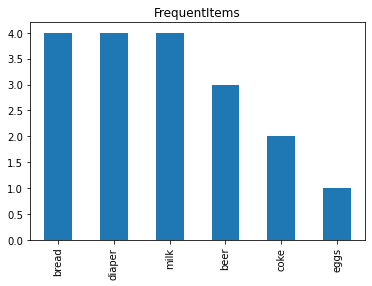

In [11]:
freq_sort['Frequency'].plot(kind='bar', title='FrequentItems')

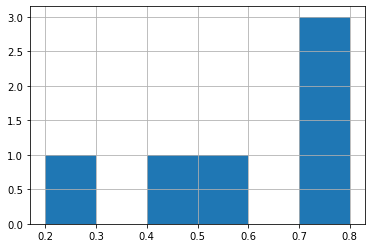

In [12]:
freq_sort['Support'].hist(bins=6);

## 3. 연관규칙 생성

In [13]:
freq_items = apriori(df, min_support=0.4, use_colnames=True)
print(freq_items)

    support               itemsets
0       0.6                 (beer)
1       0.8                (bread)
2       0.4                 (coke)
3       0.8               (diaper)
4       0.8                 (milk)
5       0.4          (bread, beer)
6       0.6         (diaper, beer)
7       0.4           (beer, milk)
8       0.6        (bread, diaper)
9       0.6          (bread, milk)
10      0.4         (diaper, coke)
11      0.4           (milk, coke)
12      0.6         (diaper, milk)
13      0.4  (bread, diaper, beer)
14      0.4   (diaper, beer, milk)
15      0.4  (bread, diaper, milk)
16      0.4   (diaper, milk, coke)


In [14]:
rules = association_rules(freq_items, metric='confidence', min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(diaper),(beer),0.8,0.6,0.6,0.75,1.250000,0.12,1.6
1,(beer),(diaper),0.6,0.8,0.6,1.00,1.250000,0.12,inf
2,(bread),(diaper),0.8,0.8,0.6,0.75,0.937500,-0.04,0.8
3,(diaper),(bread),0.8,0.8,0.6,0.75,0.937500,-0.04,0.8
4,(bread),(milk),0.8,0.8,0.6,0.75,0.937500,-0.04,0.8
5,(milk),(bread),0.8,0.8,0.6,0.75,0.937500,-0.04,0.8
6,(coke),(diaper),0.4,0.8,0.4,1.00,1.250000,0.08,inf
7,(coke),(milk),0.4,0.8,0.4,1.00,1.250000,0.08,inf
8,(diaper),(milk),0.8,0.8,0.6,0.75,0.937500,-0.04,0.8
9,(milk),(diaper),0.8,0.8,0.6,0.75,0.937500,-0.04,0.8


In [15]:
rules = rules[(rules['lift'] > 1)]
rules.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(beer),(diaper),0.6,0.8,0.6,1.00,1.250000,0.12,inf
6,(coke),(diaper),0.4,0.8,0.4,1.00,1.250000,0.08,inf
7,(coke),(milk),0.4,0.8,0.4,1.00,1.250000,0.08,inf
10,"(bread, beer)",(diaper),0.4,0.8,0.4,1.00,1.250000,0.08,inf
11,"(beer, milk)",(diaper),0.4,0.8,0.4,1.00,1.250000,0.08,inf
12,"(diaper, coke)",(milk),0.4,0.8,0.4,1.00,1.250000,0.08,inf
13,"(coke, milk)",(diaper),0.4,0.8,0.4,1.00,1.250000,0.08,inf
14,(coke),"(diaper, milk)",0.4,0.6,0.4,1.00,1.666667,0.16,inf
0,(diaper),(beer),0.8,0.6,0.6,0.75,1.250000,0.12,1.6


## 4. 결과 분석

In [16]:
rules[rules.antecedents.apply(lambda x:'diaper' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(diaper),(beer),0.8,0.6,0.6,0.75,1.25,0.12,1.6
12,"(diaper, coke)",(milk),0.4,0.8,0.4,1.00,1.25,0.08,inf


In [17]:
rules[rules.consequents.apply(lambda x:'milk' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(coke),(milk),0.4,0.8,0.4,1.0,1.250000,0.08,inf
12,"(diaper, coke)",(milk),0.4,0.8,0.4,1.0,1.250000,0.08,inf
14,(coke),"(diaper, milk)",0.4,0.6,0.4,1.0,1.666667,0.16,inf


# 실전 예제: 온라인 유통 상품의 연관성 분석

## 1. 데이터파일 준비

In [2]:
df = pd.read_excel('./Online Retail.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
df = df[['InvoiceNo', 'Description', 'Quantity', 'UnitPrice']]

## 2. 탐색적 데이터 분석

In [4]:
df[df['Quantity'] <= 0]

,InvoiceNo,Description,Quantity,UnitPrice
141,C536379,Discount,-1,27.50
154,C536383,SET OF 3 COLOURED FLYING DUCKS,-1,4.65
235,C536391,PLASTERS IN TIN CIRCUS PARADE,-12,1.65
236,C536391,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29
237,C536391,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29
...,...,...,...,...
540449,C581490,ZINC T-LIGHT HOLDER STARS SMALL,-11,0.83
541541,C581499,Manual,-1,224.69
541715,C581568,VICTORIAN SEWING BOX LARGE,-5,10.95
541716,C581569,HANGING HEART JAR T-LIGHT HOLDER,-1,1.25


In [5]:
df = df[df['Quantity'] > 0]

In [6]:
df = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum()

In [7]:
df

InvoiceNo  Description                        
536365     CREAM CUPID HEARTS COAT HANGER          8
           GLASS STAR FROSTED T-LIGHT HOLDER       6
           KNITTED UNION FLAG HOT WATER BOTTLE     6
           RED WOOLLY HOTTIE WHITE HEART.          6
           SET 7 BABUSHKA NESTING BOXES            2
                                                  ..
581587     PLASTERS IN TIN STRONGMAN              12
           SPACEBOY LUNCH BOX                     12
A563185    Adjust bad debt                         1
A563186    Adjust bad debt                         1
A563187    Adjust bad debt                         1
Name: Quantity, Length: 519974, dtype: int64

In [8]:
df = df.unstack()

In [9]:
df

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,returned,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
581587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A563185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
def encode_units(x):
    if x >= 1: return 1
    else: return 0

df = df.applymap(encode_units)
df

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,returned,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581587,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A563185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
freq = df.sum(axis=0).to_frame('Frequency')

freq_sort = freq.sort_values('Frequency', ascending=False)
freq_sort

,Frequency
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2260
JUMBO BAG RED RETROSPOT,2092
REGENCY CAKESTAND 3 TIER,1989
PARTY BUNTING,1686
LUNCH BAG RED RETROSPOT,1564
...,...
DOORKNOB CERAMIC IVORY,1
SET/4 2 TONE EGG SHAPE MIXING BOWLS,1
DUSTY PINK CHRISTMAS TREE 30CM,1


In [12]:
freq_sort = freq_sort[freq_sort['Frequency'] >1]
freq_sort

,Frequency
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2260
JUMBO BAG RED RETROSPOT,2092
REGENCY CAKESTAND 3 TIER,1989
PARTY BUNTING,1686
LUNCH BAG RED RETROSPOT,1564
...,...
BLACK FLOWER CANDLE PLATE,2
PINK FLUFFY CHRISTMAS DECORATION,2
VINTAGE BEAD PINK SHADE,2


In [15]:
freq_sort['Support'] = freq_sort['Frequency'] / len(freq_sort)
freq_sort

C:\Users\Eugene\AppData\Local\Temp\ipykernel_6148\734061004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freq_sort['Support'] = freq_sort['Frequency'] / len(freq_sort)


,Frequency,Support
Description,,
WHITE HANGING HEART T-LIGHT HOLDER,2260,0.583979
JUMBO BAG RED RETROSPOT,2092,0.540568
REGENCY CAKESTAND 3 TIER,1989,0.513953
PARTY BUNTING,1686,0.435659
LUNCH BAG RED RETROSPOT,1564,0.404134
...,...,...
BLACK FLOWER CANDLE PLATE,2,0.000517
PINK FLUFFY CHRISTMAS DECORATION,2,0.000517
VINTAGE BEAD PINK SHADE,2,0.000517


<AxesSubplot:>

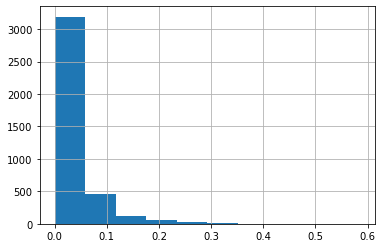

In [16]:
freq_sort['Support'].hist()

## 3. 연관규칙 생성

In [17]:
freq_items = apriori(df, min_support=0.02, use_colnames=True)
freq_items

,support,itemsets
0,0.023242,(3 STRIPEY MICE FELTCRAFT)
1,0.024037,(4 TRADITIONAL SPINNING TOPS)
2,0.047427,(6 RIBBONS RUSTIC CHARM)
3,0.021702,(60 CAKE CASES DOLLY GIRL DESIGN)
4,0.030691,(60 CAKE CASES VINTAGE CHRISTMAS)
...,...,...
370,0.020262,"(WOODEN PICTURE FRAME WHITE FINISH, WHITE HANG..."
371,0.026768,"(WOODEN FRAME ANTIQUE WHITE , WOODEN PICTURE F..."
372,0.026917,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC..."
373,0.020262,"(ROSES REGENCY TEACUP AND SAUCER , REGENCY CAK..."


In [18]:
rules = association_rules(freq_items, metric='confidence', min_threshold=0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.041120,0.065554,0.022497,0.547101,8.345784,0.019801,2.063256
1,(PACK OF 72 RETROSPOT CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.065554,0.041120,0.022497,0.343182,8.345784,0.019801,1.459886
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.048669,0.038886,0.020759,0.426531,10.968864,0.018866,1.675965
3,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.038886,0.048669,0.020759,0.533844,10.968864,0.018866,2.040800
4,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.048669,0.052195,0.031784,0.653061,12.511932,0.029244,2.731908
...,...,...,...,...,...,...,...,...,...
171,"(JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKADOT)",(JUMBO BAG RED RETROSPOT),0.025576,0.103894,0.020511,0.801942,7.718881,0.017853,4.524459
172,"(JUMBO BAG RED RETROSPOT, JUMBO BAG PINK POLKA...",(JUMBO STORAGE BAG SUKI),0.040971,0.058800,0.020511,0.500606,8.513686,0.018101,1.884684
173,(JUMBO STORAGE BAG SUKI),"(JUMBO BAG RED RETROSPOT, JUMBO BAG PINK POLKA...",0.058800,0.040971,0.020511,0.348818,8.513686,0.018101,1.472750
174,(JUMBO BAG RED RETROSPOT),"(JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKADOT)",0.103894,0.025576,0.020511,0.197419,7.718881,0.017853,1.214112


In [21]:
rules = rules[rules['lift']>1]
rules.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
158,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.029748,0.050407,0.026917,0.904841,17.950627,0.025417,9.979054
160,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.031436,0.052940,0.026917,0.856240,16.173782,0.025253,6.587791
24,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.038041,0.050407,0.031436,0.826371,16.393893,0.029519,5.469083
171,"(JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKADOT)",(JUMBO BAG RED RETROSPOT),0.025576,0.103894,0.020511,0.801942,7.718881,0.017853,4.524459
166,"(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...",(ROSES REGENCY TEACUP AND SAUCER ),0.025278,0.052940,0.020262,0.801572,15.141133,0.018924,4.772807
...,...,...,...,...,...,...,...,...,...
43,(JUMBO BAG RED RETROSPOT),(JUMBO BAG ALPHABET),0.103894,0.044994,0.020560,0.197897,4.398288,0.015886,1.190627
73,(JUMBO BAG RED RETROSPOT),(JUMBO STORAGE BAG SKULLS),0.103894,0.035012,0.020560,0.197897,5.652268,0.016923,1.203072
174,(JUMBO BAG RED RETROSPOT),"(JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKADOT)",0.103894,0.025576,0.020511,0.197419,7.718881,0.017853,1.214112
133,(WHITE HANGING HEART T-LIGHT HOLDER),(NATURAL SLATE HEART CHALKBOARD ),0.112237,0.062028,0.020610,0.183628,2.960400,0.013648,1.148952
